<a href="https://colab.research.google.com/github/HuiHongOP/Data-Science/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Different Type of Businesses Issued In NYC


![picture](https://drive.google.com/uc?id=1MX8sWS5VBJ0uIfXvdEC8uOccxf0lkhiY)

# Data gather from google drive

In this project, the main idea is to explore the dataset on https://data.cityofnewyork.us/Business/License-Applications/ptev-4hud . 
My goal is to display the different type of bussinesses issued In NYC based on different boroughs. 
1. Question : What type of business has the highest percentage? 
2. Question: Which borough have the most applications?
3. Question: How many are renewal and new applications?
4. Question: What happened to the bussiness during pandemic? Will there be more businesses or less? I assume that the license applications would decrease due to covid19.

All these questions will be answered through the project. 

The tools I will be using are pies,charts and graph(data visualization) and data cleaning. I would clean out dataset that are not in the interest of this project.

All the resource links are at the last section

In [ ]:
# Code to read csv file into Colaboratory:
#!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


downloaded = drive.CreateFile({'id':"1fPTplpEja0f7Gv7sg87BGQ9aPrdq53ud"})
downloaded.GetContentFile("Data.csv")

Using different libraries that would help to perform the tasks.

read the dataset from google drive


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.style as style
style.available
%matplotlib inline
df = pd.read_csv('Data.csv', low_memory=False)
df

,Application ID,License Number,License Type,Application or Renewal,Business Name,Status,Start Date,End Date,Temp Op Letter Issued,Temp Op Letter Expiration,License Category,Application Category,Building Number,Street,Street 2,Unit Type,Unit,Description,City,State,Zip,Contact Phone,Longitude,Latitude,Active Vehicles
0,1066-2017-RHIC,1294131-DCA,Business,Renewal,PEYKO TZENOV,Issued,01/09/2017,01/10/2017,NaN,NaN,Home Improvement Contractor,Special,3280,RESERVOIR OVAL E,NaN,NaN,NaN,NaN,BRONX,NY,10467,9178047161,-73.877091,40.876214,NaN
1,7066-2014-ASLS,2009515-DCA,Business,Application,7TH AVE GOURMET INC.,Issued,06/02/2014,06/13/2014,NaN,NaN,Stoop Line Stand,Basic,75,7TH AVE,NaN,NaN,NaN,NaN,NEW YORK,NY,10011,718-783-3806,-73.975088,40.674997,NaN
2,1164-2019-RDPD,1472251-DCA,Business,Renewal,AMERICAN EAST PHARMACY INC.,Issued,01/09/2019,01/10/2019,NaN,NaN,Dealer In Products,Basic,23,DIVISION ST,NaN,NaN,NaN,NaN,NEW YORK,NY,10002,2129251900,-73.996169,40.714118,NaN
3,33701-2016-RELE,2025971-DCA,Business,Renewal,LUCAS ELECTRONICS INC,Issued,12/31/2016,01/10/2017,NaN,NaN,Electronics Store,Basic,886,MANHATTAN AVE,NaN,NaN,NaN,NaN,BROOKLYN,NY,11222,347-987-3235,-73.954098,40.729869,NaN
4,34278-2018-RELE,2047043-DCA,Business,Renewal,ELITE WIRELESS GROUP NY LLC,Issued,12/31/2018,01/08/2019,NaN,NaN,Electronics Store,Basic,3015,CHURCH AVE,NaN,NaN,NaN,NaN,BROOKLYN,NY,11226,718-484-7746,-73.949327,40.650826,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412076,21826-2021-RECD,2077029-1-DCA,Business,Renewal,116 GREENE BITES CORP,Issued,09/29/2021,09/30/2021,NaN,NaN,Electronic Cigarette Dealer,Basic,116,DEKALB AVE,NaN,NaN,NaN,NaN,BROOKLYN,NY,11201,718-522-4455,-73.978040,40.689803,NaN
412077,21708-2021-RECD,2066359-1-DCA,Business,Renewal,"AMERICAN FLAG DELI AND GROCERY, INC.",Issued,09/28/2021,09/29/2021,NaN,NaN,Electronic Cigarette Dealer,Basic,7515,PARSONS BLVD,NaN,NaN,NaN,NaN,FRESH MEADOWS,NY,11366,718-591-0475,-73.810687,40.726149,NaN
412078,9264-2020-RTTD,2045801-DCA,Individual,Renewal,ROBERT REGALADO,Denied,10/05/2020,09/25/2021,NaN,NaN,Tow Truck Driver,Basic,NaN,NaN,NaN,NaN,NaN,NaN,BRONX,NY,10469,NaN,NaN,NaN,NaN
412079,21500-2021-RECD,2074958-1-DCA,Business,Renewal,ZK 10504 CORPORATION,Issued,09/24/2021,09/25/2021,NaN,NaN,Electronic Cigarette Dealer,Basic,10504,FLATLANDS AVE,NaN,NaN,NaN,NaN,BROOKLYN,NY,11236,9173197519,-73.894550,40.647602,NaN


#Data Cleaning


1. Dropping out all the nan rows from useful dataframe columns
2. Dropping out all the columns that are not being used in this project
3. Taking "Only" the New York City application rows
4. Convert those rows back into dataframe
5. Reset the index for rows
6. Print the dataframe

In [ ]:
#Dropping out all those rows that are nan or left blank without useful information
df.dropna(subset = ['License Number',"License Type","Application or Renewal",'Business Name','Start Date','Status','License Category','City','State'],inplace= True)
#Dropping out the columns that are not being used
df.drop(columns=['Temp Op Letter Issued','Temp Op Letter Expiration','Street 2','Unit Type','Unit','Description','Longitude','Latitude','Active Vehicles'],inplace=True)

#Taking in the rows that are within the state of New York City applications
df = [row for (index,row) in df.iterrows() if row.State == "NY"]
#Convert back into dataframe
df = pd.DataFrame(df)
#re Order the index after removed the not needed rows
df = df.reset_index(drop=True)
df

,Application ID,License Number,License Type,Application or Renewal,Business Name,Status,Start Date,End Date,License Category,Application Category,Building Number,Street,City,State,Zip,Contact Phone
0,1066-2017-RHIC,1294131-DCA,Business,Renewal,PEYKO TZENOV,Issued,01/09/2017,01/10/2017,Home Improvement Contractor,Special,3280,RESERVOIR OVAL E,BRONX,NY,10467,9178047161
1,7066-2014-ASLS,2009515-DCA,Business,Application,7TH AVE GOURMET INC.,Issued,06/02/2014,06/13/2014,Stoop Line Stand,Basic,75,7TH AVE,NEW YORK,NY,10011,718-783-3806
2,1164-2019-RDPD,1472251-DCA,Business,Renewal,AMERICAN EAST PHARMACY INC.,Issued,01/09/2019,01/10/2019,Dealer In Products,Basic,23,DIVISION ST,NEW YORK,NY,10002,2129251900
3,33701-2016-RELE,2025971-DCA,Business,Renewal,LUCAS ELECTRONICS INC,Issued,12/31/2016,01/10/2017,Electronics Store,Basic,886,MANHATTAN AVE,BROOKLYN,NY,11222,347-987-3235
4,34278-2018-RELE,2047043-DCA,Business,Renewal,ELITE WIRELESS GROUP NY LLC,Issued,12/31/2018,01/08/2019,Electronics Store,Basic,3015,CHURCH AVE,BROOKLYN,NY,11226,718-484-7746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371862,5443-2021-ATRD,2101747-2-DCA,Business,Application,BUSHWICK MINIMART INC,Issued,09/22/2021,09/24/2021,Tobacco Retail Dealer,Basic,1124,BUSHWICK AVE,BROOKLYN,NY,11221,6466455401
371863,21826-2021-RECD,2077029-1-DCA,Business,Renewal,116 GREENE BITES CORP,Issued,09/29/2021,09/30/2021,Electronic Cigarette Dealer,Basic,116,DEKALB AVE,BROOKLYN,NY,11201,718-522-4455
371864,21708-2021-RECD,2066359-1-DCA,Business,Renewal,"AMERICAN FLAG DELI AND GROCERY, INC.",Issued,09/28/2021,09/29/2021,Electronic Cigarette Dealer,Basic,7515,PARSONS BLVD,FRESH MEADOWS,NY,11366,718-591-0475
371865,9264-2020-RTTD,2045801-DCA,Individual,Renewal,ROBERT REGALADO,Denied,10/05/2020,09/25/2021,Tow Truck Driver,Basic,NaN,NaN,BRONX,NY,10469,NaN


In [ ]:
#Convert the columns of "City" to lower case
df["City"] = df["City"].str.lower()
df

,Application ID,License Number,License Type,Application or Renewal,Business Name,Status,Start Date,End Date,License Category,Application Category,Building Number,Street,City,State,Zip,Contact Phone
0,1066-2017-RHIC,1294131-DCA,Business,Renewal,PEYKO TZENOV,Issued,01/09/2017,01/10/2017,Home Improvement Contractor,Special,3280,RESERVOIR OVAL E,bronx,NY,10467,9178047161
1,7066-2014-ASLS,2009515-DCA,Business,Application,7TH AVE GOURMET INC.,Issued,06/02/2014,06/13/2014,Stoop Line Stand,Basic,75,7TH AVE,new york,NY,10011,718-783-3806
2,1164-2019-RDPD,1472251-DCA,Business,Renewal,AMERICAN EAST PHARMACY INC.,Issued,01/09/2019,01/10/2019,Dealer In Products,Basic,23,DIVISION ST,new york,NY,10002,2129251900
3,33701-2016-RELE,2025971-DCA,Business,Renewal,LUCAS ELECTRONICS INC,Issued,12/31/2016,01/10/2017,Electronics Store,Basic,886,MANHATTAN AVE,brooklyn,NY,11222,347-987-3235
4,34278-2018-RELE,2047043-DCA,Business,Renewal,ELITE WIRELESS GROUP NY LLC,Issued,12/31/2018,01/08/2019,Electronics Store,Basic,3015,CHURCH AVE,brooklyn,NY,11226,718-484-7746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371862,5443-2021-ATRD,2101747-2-DCA,Business,Application,BUSHWICK MINIMART INC,Issued,09/22/2021,09/24/2021,Tobacco Retail Dealer,Basic,1124,BUSHWICK AVE,brooklyn,NY,11221,6466455401
371863,21826-2021-RECD,2077029-1-DCA,Business,Renewal,116 GREENE BITES CORP,Issued,09/29/2021,09/30/2021,Electronic Cigarette Dealer,Basic,116,DEKALB AVE,brooklyn,NY,11201,718-522-4455
371864,21708-2021-RECD,2066359-1-DCA,Business,Renewal,"AMERICAN FLAG DELI AND GROCERY, INC.",Issued,09/28/2021,09/29/2021,Electronic Cigarette Dealer,Basic,7515,PARSONS BLVD,fresh meadows,NY,11366,718-591-0475
371865,9264-2020-RTTD,2045801-DCA,Individual,Renewal,ROBERT REGALADO,Denied,10/05/2020,09/25/2021,Tow Truck Driver,Basic,NaN,NaN,bronx,NY,10469,NaN


1.Printing out the top 60 unique count for the column from 'City'

Some of those cities being inputted were neighborhood of different boroughs of New York City


In [ ]:
#As we noticed some of the cities names were not the names of the 5 boroughs.
#For time saving purposes,I will be using the top 60 most unique cities names and convert them into one of the 5 borough names.
#Some names were shortcut so I wouldn't be able to complete the whole project in time if we go through them one by one.
df['City'].value_counts().head(60)

brooklyn               97453
new york               75126
bronx                  49710
staten island          22218
jamaica                 9646
flushing                8754
astoria                 7853
corona                  4066
woodside                3601
ridgewood               3396
elmhurst                3137
ozone park              2845
jackson heights         2576
yonkers                 2314
long island city        2283
forest hills            2283
maspeth                 2238
south richmond hill     2235
richmond hill           2072
bayside                 1957
east elmhurst           1860
whitestone              1798
fresh meadows           1787
queens village          1686
rego park               1633
glendale                1625
woodhaven               1566
south ozone park        1496
sunnyside               1347
valley stream           1244
college point           1184
howard beach            1133
middle village          1103
hollis                  1102
new hyde park 

I have extracted out the top 60 cities into different boroughs of New York City

Those that are not within the 5 boroughs would be dropped out.

I created 5 lists that contain those neighorhood in that borough.Thus, it would make it easier for cleaing the dataset and converting them

In [ ]:
#We will be using only those in the one of the 5 boroughs:
#I have converted them into the one of the 5 boroughs from the top 60
#In this Case, we will treating "new york" as Manhattan 
Manhattan = ['new york']
Brooklyn = ['brooklyn']
Staten = ['staten island',]
Queens = ['jamaica','flushing','astoria','corona','woodside','ridgewood','elmhurst','ozone park','jackson heights','forest hills',
'long island city','maspeth','south richmond hill','richmond hill','bayside','east elmhurst','whitestone','fresh meadows',
'queens village','rego park','glendale','woodhaven','south ozone park','sunnyside',
'college point','howard beach','middle village','hollis','new hyde park',
'far rockaway','saint albans','jackson hts','bellerose','rosedale','s ozone park',
'queens vlg','floral park','s richmond hl','little neck','rockaway park','long is city',
'kew gardens','oakland gardens','springfield gardens','middle vlg','laurelton',
]
Bronx = ['bronx']

#Converting those neigborhood or city of the 5 boroughs into their specific category of the borough.
#return the new dataframe
def convert_to_borough(df):
  for x in range(0,len(df)):
    if df['City'][x] in Manhattan:
      df['City'][x] = 'Manhatten'
    elif df['City'][x] in Brooklyn:
      df['City'][x] = 'Brooklyn'
    elif df['City'][x] in Staten:
      df['City'][x] = "Staten Island"
    elif df['City'][x] in Queens:
      df['City'][x] = 'Queens'
    elif df['City'][x] in Bronx:
      df['City'][x] = 'Bronx'
    else:
      pass
  return df 

1. Only taking in rows that are in those 5 lists 
2. Convert to dataframe
3. Reset the indexes 

In [ ]:
#Part of the data cleaning were we only taking in useful data rows that are in one of the 5 boroughs
df = [row for (index,row) in df.iterrows() if row.City in Manhattan or row.City in Brooklyn or row.City in Staten or row.City in Queens or row.City in Bronx]
df = pd.DataFrame(df)
#re Order the index after removed the not needed rows
df = df.reset_index(drop=True)
df

,Application ID,License Number,License Type,Application or Renewal,Business Name,Status,Start Date,End Date,License Category,Application Category,Building Number,Street,City,State,Zip,Contact Phone
0,1066-2017-RHIC,1294131-DCA,Business,Renewal,PEYKO TZENOV,Issued,01/09/2017,01/10/2017,Home Improvement Contractor,Special,3280,RESERVOIR OVAL E,bronx,NY,10467,9178047161
1,7066-2014-ASLS,2009515-DCA,Business,Application,7TH AVE GOURMET INC.,Issued,06/02/2014,06/13/2014,Stoop Line Stand,Basic,75,7TH AVE,new york,NY,10011,718-783-3806
2,1164-2019-RDPD,1472251-DCA,Business,Renewal,AMERICAN EAST PHARMACY INC.,Issued,01/09/2019,01/10/2019,Dealer In Products,Basic,23,DIVISION ST,new york,NY,10002,2129251900
3,33701-2016-RELE,2025971-DCA,Business,Renewal,LUCAS ELECTRONICS INC,Issued,12/31/2016,01/10/2017,Electronics Store,Basic,886,MANHATTAN AVE,brooklyn,NY,11222,347-987-3235
4,34278-2018-RELE,2047043-DCA,Business,Renewal,ELITE WIRELESS GROUP NY LLC,Issued,12/31/2018,01/08/2019,Electronics Store,Basic,3015,CHURCH AVE,brooklyn,NY,11226,718-484-7746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335819,5443-2021-ATRD,2101747-2-DCA,Business,Application,BUSHWICK MINIMART INC,Issued,09/22/2021,09/24/2021,Tobacco Retail Dealer,Basic,1124,BUSHWICK AVE,brooklyn,NY,11221,6466455401
335820,21826-2021-RECD,2077029-1-DCA,Business,Renewal,116 GREENE BITES CORP,Issued,09/29/2021,09/30/2021,Electronic Cigarette Dealer,Basic,116,DEKALB AVE,brooklyn,NY,11201,718-522-4455
335821,21708-2021-RECD,2066359-1-DCA,Business,Renewal,"AMERICAN FLAG DELI AND GROCERY, INC.",Issued,09/28/2021,09/29/2021,Electronic Cigarette Dealer,Basic,7515,PARSONS BLVD,fresh meadows,NY,11366,718-591-0475
335822,9264-2020-RTTD,2045801-DCA,Individual,Renewal,ROBERT REGALADO,Denied,10/05/2020,09/25/2021,Tow Truck Driver,Basic,NaN,NaN,bronx,NY,10469,NaN


This function here would help to clean up the dataset for the City column. 

It be converted into 5 different boroughs in NYC that is interested in the project.

In [ ]:
#Call the function and convert those neigborhood/city names into one of the 5 boroughs
df = convert_to_borough(df)
df.head(10)

,Application ID,License Number,License Type,Application or Renewal,Business Name,Status,Start Date,End Date,License Category,Application Category,Building Number,Street,City,State,Zip,Contact Phone
0,1066-2017-RHIC,1294131-DCA,Business,Renewal,PEYKO TZENOV,Issued,01/09/2017,01/10/2017,Home Improvement Contractor,Special,3280,RESERVOIR OVAL E,Bronx,NY,10467,9178047161
1,7066-2014-ASLS,2009515-DCA,Business,Application,7TH AVE GOURMET INC.,Issued,06/02/2014,06/13/2014,Stoop Line Stand,Basic,75,7TH AVE,Manhatten,NY,10011,718-783-3806
2,1164-2019-RDPD,1472251-DCA,Business,Renewal,AMERICAN EAST PHARMACY INC.,Issued,01/09/2019,01/10/2019,Dealer In Products,Basic,23,DIVISION ST,Manhatten,NY,10002,2129251900
3,33701-2016-RELE,2025971-DCA,Business,Renewal,LUCAS ELECTRONICS INC,Issued,12/31/2016,01/10/2017,Electronics Store,Basic,886,MANHATTAN AVE,Brooklyn,NY,11222,347-987-3235
4,34278-2018-RELE,2047043-DCA,Business,Renewal,ELITE WIRELESS GROUP NY LLC,Issued,12/31/2018,01/08/2019,Electronics Store,Basic,3015,CHURCH AVE,Brooklyn,NY,11226,718-484-7746
5,3891-2019-ALAU,2085269-DCA,Business,Application,"A-LIN LAUNDROMAT, INC.",Issued,04/07/2019,05/02/2019,Laundries,Basic,5509,4TH AVE,Brooklyn,NY,11220,NaN
6,12418-2017-AELE,2057790-DCA,Business,Application,RIDGE WIRELESS CORP,Issued,08/31/2017,09/02/2017,Electronics Store,Basic,9514,4TH AVE,Brooklyn,NY,11209,NaN
7,7887-2016-RPDD,1387189-DCA,Individual,Renewal,SOULEYMANE TOURE,Issued,05/06/2016,05/06/2016,Pedicab Driver,Basic,NaN,NaN,Bronx,NY,10453,NaN
8,30775-2018-RHIC,2026096-DCA,Business,Renewal,AMERICAN STANDARD INTERIORS CORP,Denied,12/05/2018,01/07/2019,Home Improvement Contractor,Special,3426,29TH ST,Queens,NY,11106,NaN
9,18668-2019-RHIS,2034414-DCA,Individual,Renewal,ANDREA V DAVIS,Issued,04/26/2019,04/27/2019,Home Improvement Salesperson,Special,NaN,NaN,Manhatten,NY,10002,NaN


In [ ]:
#Display the unique License Category name with it's number counts
df['License Category'].value_counts()

Tobacco Retail Dealer             83328
Home Improvement Contractor       44013
Home Improvement Salesperson      34529
Secondhand Dealer - General       19428
Electronics Store                 15059
General Vendor                    14983
Temporary Street Fair Vendor      12485
Sightseeing Guide                  9478
Tow Truck Driver                   9439
Stoop Line Stand                   8902
Laundries                          8441
Electronic & Appliance Service     7565
Locksmith                          7224
Electronic Cigarette Dealer        6459
Ticket Seller                      5360
Garage                             5156
Pedicab Driver                     4418
Sidewalk Cafe                      4334
Laundry                            3536
Dealer In Products                 3137
Secondhand Dealer - Auto           2808
Pawnbroker                         2603
Process Server Individual          2460
Laundry Jobber                     2432
Amusement Device Portable          2400


#Data Visualization

As we do a pie chat here, We can see that the under the License Category. 

Tobacco Retail Dealer take up the most of the bussiness license.



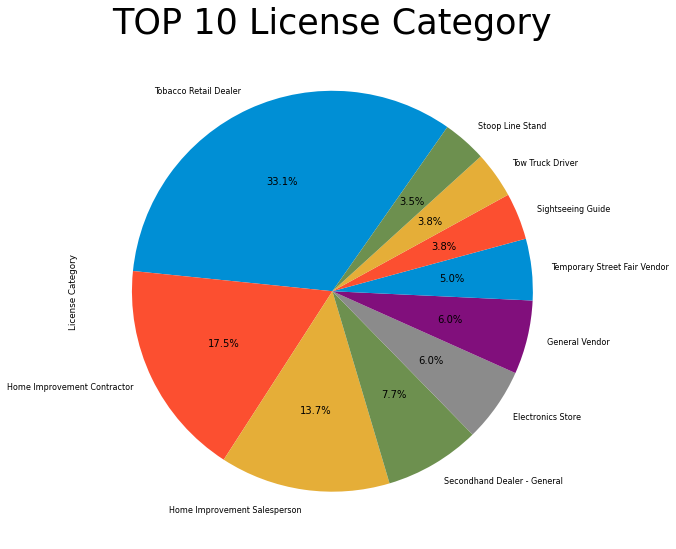

In [ ]:
#Display the unique License Category name with it's number counts
#Display the top 10 of the unique License Cateogry
df['License Category'].value_counts().head(10).plot.pie(figsize=(8,10),autopct='%1.1f%%',startangle =55)
plt.title("TOP 10 License Category", fontsize = 35)
plt.show()

In [ ]:
df['City'].value_counts()

Brooklyn         97453
Queens           91317
Manhatten        75126
Bronx            49710
Staten Island    22218
Name: City, dtype: int64

As for the license applications, it is almost in between brooklyn, queens, and manhatten. 

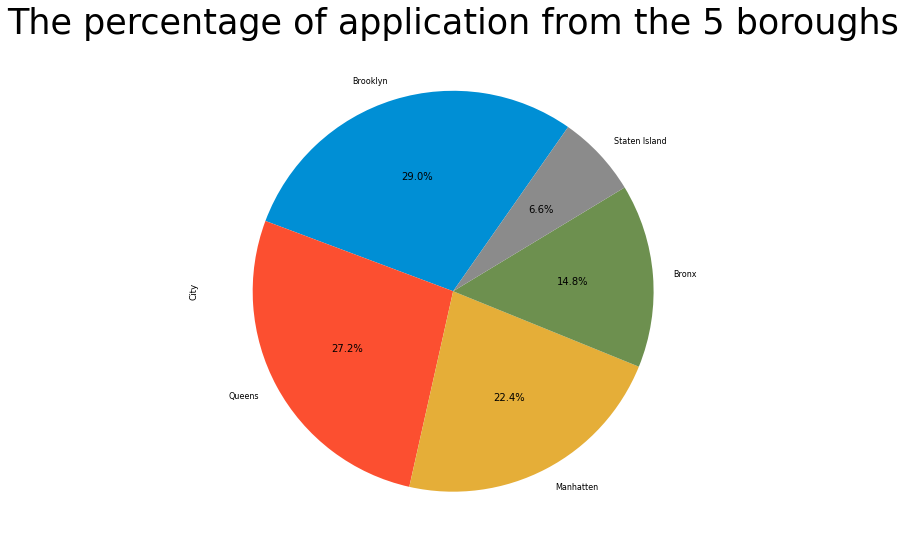

In [ ]:
#Display the unique License Category name with it's number counts
#Display the top 10 of the unique License Cateogry
df['City'].value_counts().head(10).plot.pie(figsize=(8,10),autopct='%1.1f%%',startangle =55)
plt.title("The percentage of application from the 5 boroughs", fontsize = 35)
plt.show()

This is a bar graph that display them in number of application per borough. Brookly have close to 100k license applications

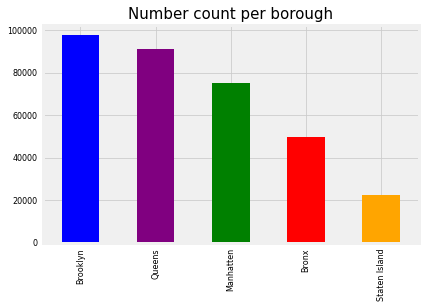

Brooklyn         97453
Queens           91317
Manhatten        75126
Bronx            49710
Staten Island    22218
Name: City, dtype: int64

In [ ]:
#display a bar chart that shows number of fake and real news 
(df["City"]).value_counts().plot.bar( color = ['blue', 'purple','green','red','orange'])
plt.title("Number count per borough",fontsize = 15)
plt.show()
df["City"].value_counts()

This shows how many of them are renewal vs new applications.

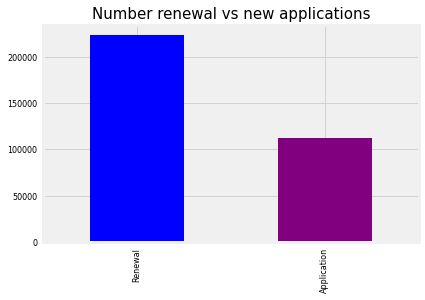

Renewal        223459
Application    112365
Name: Application or Renewal, dtype: int64

In [ ]:
#display a bar chart that shows number of fake and real news 
(df["Application or Renewal"]).value_counts().plot.bar( color = ['blue', 'purple'])
plt.title("Number renewal vs new applications",fontsize = 15)
plt.show()
df["Application or Renewal"].value_counts()

#Little Analysis

The acceptance rate is pretty high for obtainning a license from the application based on New York City. 

It has a rate of 98%

In [ ]:
#Taking in those denied and Issued applications 
#Calculate the acceptance rate
Denied = [row.Status for (index,row) in df.iterrows() if row.Status == "Denied"]
Issued = [row.Status for (index,row) in df.iterrows() if row.Status == "Issued"]
total_denied = len(Denied)
total_issued = len(Issued)
print(f"Total Denied Application in New York City: {total_denied}")
print(f"Total accepted Application in New York City: {total_issued}")

print(f"The Acceptance Rate is: {total_issued/len(df['Status'])}")

Total Denied Application in New York City: 2676
Total accepted Application in New York City: 331072
The Acceptance Rate is: 0.9858497308113774


#More Data Cleaning for graph display


We are interested in the year that the applications started on and which borough was it on.

 Therefore, we will be converting the date into years only.
 

In [ ]:
#Help out cleaning out the day and month.
#return the year of the row
def convert_year(string):
  time_object = datetime.strptime(string,'%m/%d/%Y')
  year = time_object.year
  return year 

Apply the function and clean out the column 'Start Date' into years

In [ ]:
#Apply the function and return year into the data rows
df['Start Date'] = df['Start Date'].apply(convert_year)
df.head(10)

,Application ID,License Number,License Type,Application or Renewal,Business Name,Status,Start Date,End Date,License Category,Application Category,Building Number,Street,City,State,Zip,Contact Phone
0,1066-2017-RHIC,1294131-DCA,Business,Renewal,PEYKO TZENOV,Issued,2017,01/10/2017,Home Improvement Contractor,Special,3280,RESERVOIR OVAL E,Bronx,NY,10467,9178047161
1,7066-2014-ASLS,2009515-DCA,Business,Application,7TH AVE GOURMET INC.,Issued,2014,06/13/2014,Stoop Line Stand,Basic,75,7TH AVE,Manhatten,NY,10011,718-783-3806
2,1164-2019-RDPD,1472251-DCA,Business,Renewal,AMERICAN EAST PHARMACY INC.,Issued,2019,01/10/2019,Dealer In Products,Basic,23,DIVISION ST,Manhatten,NY,10002,2129251900
3,33701-2016-RELE,2025971-DCA,Business,Renewal,LUCAS ELECTRONICS INC,Issued,2016,01/10/2017,Electronics Store,Basic,886,MANHATTAN AVE,Brooklyn,NY,11222,347-987-3235
4,34278-2018-RELE,2047043-DCA,Business,Renewal,ELITE WIRELESS GROUP NY LLC,Issued,2018,01/08/2019,Electronics Store,Basic,3015,CHURCH AVE,Brooklyn,NY,11226,718-484-7746
5,3891-2019-ALAU,2085269-DCA,Business,Application,"A-LIN LAUNDROMAT, INC.",Issued,2019,05/02/2019,Laundries,Basic,5509,4TH AVE,Brooklyn,NY,11220,NaN
6,12418-2017-AELE,2057790-DCA,Business,Application,RIDGE WIRELESS CORP,Issued,2017,09/02/2017,Electronics Store,Basic,9514,4TH AVE,Brooklyn,NY,11209,NaN
7,7887-2016-RPDD,1387189-DCA,Individual,Renewal,SOULEYMANE TOURE,Issued,2016,05/06/2016,Pedicab Driver,Basic,NaN,NaN,Bronx,NY,10453,NaN
8,30775-2018-RHIC,2026096-DCA,Business,Renewal,AMERICAN STANDARD INTERIORS CORP,Denied,2018,01/07/2019,Home Improvement Contractor,Special,3426,29TH ST,Queens,NY,11106,NaN
9,18668-2019-RHIS,2034414-DCA,Individual,Renewal,ANDREA V DAVIS,Issued,2019,04/27/2019,Home Improvement Salesperson,Special,NaN,NaN,Manhatten,NY,10002,NaN


Adding the one as a new columns that would help us to calculate later on with boroughs

In [ ]:
df['Value'] = 1
df.head(10)

,Application ID,License Number,License Type,Application or Renewal,Business Name,Status,Start Date,End Date,License Category,Application Category,Building Number,Street,City,State,Zip,Contact Phone,Value
0,1066-2017-RHIC,1294131-DCA,Business,Renewal,PEYKO TZENOV,Issued,2017,01/10/2017,Home Improvement Contractor,Special,3280,RESERVOIR OVAL E,Bronx,NY,10467,9178047161,1
1,7066-2014-ASLS,2009515-DCA,Business,Application,7TH AVE GOURMET INC.,Issued,2014,06/13/2014,Stoop Line Stand,Basic,75,7TH AVE,Manhatten,NY,10011,718-783-3806,1
2,1164-2019-RDPD,1472251-DCA,Business,Renewal,AMERICAN EAST PHARMACY INC.,Issued,2019,01/10/2019,Dealer In Products,Basic,23,DIVISION ST,Manhatten,NY,10002,2129251900,1
3,33701-2016-RELE,2025971-DCA,Business,Renewal,LUCAS ELECTRONICS INC,Issued,2016,01/10/2017,Electronics Store,Basic,886,MANHATTAN AVE,Brooklyn,NY,11222,347-987-3235,1
4,34278-2018-RELE,2047043-DCA,Business,Renewal,ELITE WIRELESS GROUP NY LLC,Issued,2018,01/08/2019,Electronics Store,Basic,3015,CHURCH AVE,Brooklyn,NY,11226,718-484-7746,1
5,3891-2019-ALAU,2085269-DCA,Business,Application,"A-LIN LAUNDROMAT, INC.",Issued,2019,05/02/2019,Laundries,Basic,5509,4TH AVE,Brooklyn,NY,11220,NaN,1
6,12418-2017-AELE,2057790-DCA,Business,Application,RIDGE WIRELESS CORP,Issued,2017,09/02/2017,Electronics Store,Basic,9514,4TH AVE,Brooklyn,NY,11209,NaN,1
7,7887-2016-RPDD,1387189-DCA,Individual,Renewal,SOULEYMANE TOURE,Issued,2016,05/06/2016,Pedicab Driver,Basic,NaN,NaN,Bronx,NY,10453,NaN,1
8,30775-2018-RHIC,2026096-DCA,Business,Renewal,AMERICAN STANDARD INTERIORS CORP,Denied,2018,01/07/2019,Home Improvement Contractor,Special,3426,29TH ST,Queens,NY,11106,NaN,1
9,18668-2019-RHIS,2034414-DCA,Individual,Renewal,ANDREA V DAVIS,Issued,2019,04/27/2019,Home Improvement Salesperson,Special,NaN,NaN,Manhatten,NY,10002,NaN,1


In [ ]:
#Dropping out all the columns that are not useful for this specific task
df.drop(columns=['Application ID','License Number','License Type','Application or Renewal','Business Name','Status','End Date','License Category','Application Category',
                 'Building Number','Street','State','Zip','Contact Phone',],inplace=True)
df

,Start Date,City,Value
0,2017,Bronx,1
1,2014,Manhatten,1
2,2019,Manhatten,1
3,2016,Brooklyn,1
4,2018,Brooklyn,1
...,...,...,...
335819,2021,Brooklyn,1
335820,2021,Brooklyn,1
335821,2021,Queens,1
335822,2020,Bronx,1


Using pivot table and group them by year

In [ ]:
#Grouping them by Year of the Start Date
#Make unique columns using the "City" columns and sum them
table = df.pivot_table(index='Start Date', columns="City", values="Value",aggfunc='sum').reset_index()
table.head(10)

City,Start Date,Bronx,Brooklyn,Manhatten,Queens,Staten Island
0,1998,2.0,2.0,7.0,6.0,NaN
1,1999,1.0,NaN,2.0,NaN,1.0
2,2000,753.0,1509.0,1358.0,1025.0,199.0
3,2001,674.0,1383.0,1334.0,932.0,150.0
4,2002,558.0,1013.0,815.0,667.0,111.0
5,2003,740.0,1156.0,950.0,872.0,151.0
6,2004,725.0,1114.0,944.0,887.0,166.0
7,2005,722.0,1067.0,780.0,798.0,162.0
8,2006,684.0,1115.0,740.0,830.0,147.0
9,2007,613.0,1043.0,687.0,801.0,148.0


In [ ]:
#Fill out the nan as 0 for all the 5 boroughs
table['Bronx'] = table['Bronx'].fillna(0)
table['Brooklyn'] = table['Brooklyn'].fillna(0)
table['Manhatten'] = table['Manhatten'].fillna(0)
table['Queens'] = table['Queens'].fillna(0)
table['Staten Island'] = table['Staten Island'].fillna(0)
table = pd.DataFrame(table.to_records())
table.drop(columns='index',inplace = True)
#Rename the 'Start Date' into "Year" column
table = table.rename(columns={"Start Date": "Year"})
table.head(10)

,Year,Bronx,Brooklyn,Manhatten,Queens,Staten Island
0,1998,2.0,2.0,7.0,6.0,0.0
1,1999,1.0,0.0,2.0,0.0,1.0
2,2000,753.0,1509.0,1358.0,1025.0,199.0
3,2001,674.0,1383.0,1334.0,932.0,150.0
4,2002,558.0,1013.0,815.0,667.0,111.0
5,2003,740.0,1156.0,950.0,872.0,151.0
6,2004,725.0,1114.0,944.0,887.0,166.0
7,2005,722.0,1067.0,780.0,798.0,162.0
8,2006,684.0,1115.0,740.0,830.0,147.0
9,2007,613.0,1043.0,687.0,801.0,148.0


As we see below on the graph, during pandemic there were a huge strike down on business license applications. 

It could due to that businesses are shutting down and that would affect some businesses who would renewal the license applications.

Text(2015, 2450, 'Staten Island')

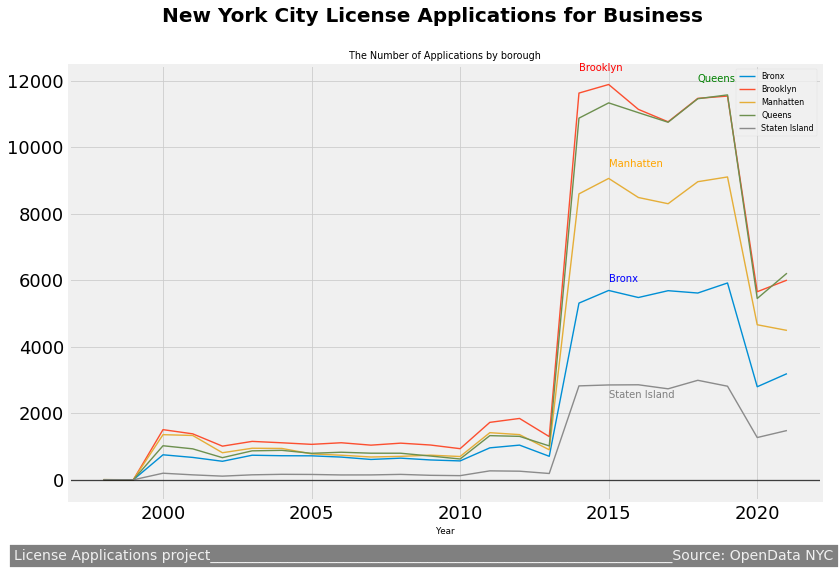

In [ ]:
y_axis = table.loc[0,table.loc[0] <20]
y_axis
table['Year']
style.use('seaborn-paper')
#plot the graph with it's year againist the 5 different boroughs
graph = table.plot(x = 'Year', y = y_axis.index,figsize = (12,8))
graph.tick_params(axis = 'both', which = 'major',labelsize= 18)
graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
#Create titles for the graph
plt.suptitle("New York City License Applications for Business", fontsize =20, fontweight='bold')
plt.title("The Number of Applications by borough")
#Display the bottom line of source
graph.text(x = 1995, y = -2400,
    s = 'License Applications project__________________________________________________________________Source: OpenData NYC',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
#Add labels into the lines of the 5 boroughs
graph.text(x = 2015, y = 5950, s = 'Bronx', color = 'blue')
graph.text(x = 2014, y = 12300, s = 'Brooklyn', color = 'red')
graph.text(x = 2015, y = 9400, s = 'Manhatten', color = 'orange')
graph.text(x = 2018, y = 11950, s = 'Queens', color = 'green')
graph.text(x = 2015, y = 2450, s = 'Staten Island', color = 'grey')

#Resource Links

1. https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92 (get dataset from google drive)
2. #Inspired by https://www.dataquest.io/blog/making-538-plots/ and from hw#15 Coursework
3. #https://data.cityofnewyork.us/Business/License-Applications/ptev-4hud ( Dataset)
4. https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html ( create
 pivot table)
5. https://www.sisense.com/blog/data-visualizations-in-python-and-r/ (Data visualization)
6. https://docs.python.org/3/library/datetime.html ( datetime)


